### IMPORTING LIBRARIES

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### MAIN DATASET OF ENERGY IMPORTATIONS AND EXPORTATIONS PER CANADIAN PROVINCE

In [23]:
# Getting the monthly energy importations and exportations dataset
path_monthly = 'C:\\Users\\felip\\JupyterLab Projects\\Analytics Tools and Decision Making\\electricity-exports\\electricity-exports-and-imports-monthly.csv'
df = pd.read_csv(path_monthly, sep=',', encoding='ISO-8859-1')

# Taking off the "Total" rows (represents the summation of all energy exported or imported in all provinces in the month)
df = df[df['Source'] != 'Total']
df = df[df['Destination'] != 'Total']

### EXPLORATORY DATA ANALYSIS

In [40]:
# Displaying number of rows and columns on the dataframe
df.shape

(18824, 7)

In [39]:
# Displaying five first rows of the dataframe
df.head()

,Period,Activity,Source,Destination,Energy (MW.h),Total Value (CAN$),Price (CAN$/MW.h)
0,01/01/1990,Exports,British Columbia,Alaska,75.196,4536.00,60.32
1,01/01/1990,Exports,British Columbia,California,345904.000,11144596.03,32.22
2,01/01/1990,Exports,British Columbia,Oregon,148800.000,4770498.00,32.06
4,01/01/1990,Exports,British Columbia,Washington,1982.400,80960.00,40.84
5,01/01/1990,Exports,Manitoba,Minnesota,5100.424,129051.37,25.30


In [87]:
# Displaying general info about dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18821 entries, 0 to 39081
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Period              18821 non-null  object 
 1   Activity            18821 non-null  object 
 2   Source              18821 non-null  object 
 3   Destination         18821 non-null  object 
 4   Energy (MW.h)       18821 non-null  float64
 5   Total Value (CAN$)  18821 non-null  float64
 6   Price (CAN$/MW.h)   18821 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.1+ MB


In [89]:
# Displaying  the amount of times each value appear in the 'Source' column
df['Source'].value_counts()

British Columbia                           3597
Ontario                                    2636
Québec                                     1598
Manitoba                                    947
Alberta                                     889
Washington                                  815
New York                                    765
Montana                                     546
Maine                                       532
North Dakota                                511
Minnesota                                   501
New Brunswick                               495
Saskatchewan                                454
Michigan                                    441
Pennsylvania                                432
Minn / N. Dakota                            344
Indiana                                     341
Oregon                                      320
Vermont                                     248
California                                  212
Arizona                                 

In [90]:
# Displaying  the amount of times each value appear in the 'Destination' column
df['Destination'].value_counts()

British Columbia                           2334
Ontario                                    1940
Alberta                                    1115
New York                                    910
Maine                                       894
Québec                                      823
New England-ISO                             751
Washington                                  727
North Dakota                                604
Manitoba                                    595
Vermont                                     576
Minnesota                                   490
Oregon                                      488
Michigan                                    469
Indiana                                     453
Saskatchewan                                452
California                                  450
Montana                                     437
New Brunswick                               423
Minn / N. Dakota                            382
Alaska                                  

In [35]:
# Displaying the amount of duplicated rows in the dataframe
len(df[df.duplicated()])

0

In [43]:
# Displaying nan values in each row
df.isna().sum()

Period                0
Activity              0
Source                0
Destination           3
Energy (MW.h)         0
Total Value (CAN$)    0
Price (CAN$/MW.h)     0
dtype: int64

In [59]:
# Taking the nan values off
df = df[~df['Destination'].isna()]

In [60]:
# Checking if the nan values were removed
df.isna().sum()

Period                0
Activity              0
Source                0
Destination           0
Energy (MW.h)         0
Total Value (CAN$)    0
Price (CAN$/MW.h)     0
dtype: int64

In [74]:
# Displaying the first and the last date of the dataset
print(f'{df["Period"].min()} : {df["Period"].max()}')

01/01/1990 : 12/01/2021


In [94]:
# Calculating the price of the "Confidential" prices
df_confidential = df[df['Price (CAN$/MW.h)'] == 'Confidential']
df = df[df['Price (CAN$/MW.h)'] != 'Confidential']
df_confidential['Price (CAN$/MW.h)'] = df_confidential['Total Value (CAN$)']/df_confidential['Energy (MW.h)']
df = pd.concat([df, df_confidential], axis=0)

C:\Users\felip\AppData\Local\Temp\ipykernel_2520\2267134009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_confidential['Price (CAN$/MW.h)'] = df_confidential['Total Value (CAN$)']/df_confidential['Energy (MW.h)']


In [166]:
# Turning the values of the 'Price (CAN$/MW.h)' column into float
df['Price (CAN$/MW.h)'] = df['Price (CAN$/MW.h)'].astype(float)

# Turning the values of the 'Period' column into date
df['Period'] = pd.to_datetime(df['Period'])

In [98]:
# Checking if the last command worked
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18821 entries, 0 to 38978
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Period              18821 non-null  object 
 1   Activity            18821 non-null  object 
 2   Source              18821 non-null  object 
 3   Destination         18821 non-null  object 
 4   Energy (MW.h)       18821 non-null  float64
 5   Total Value (CAN$)  18821 non-null  float64
 6   Price (CAN$/MW.h)   18821 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.1+ MB


In [104]:
# Looking for negative values in the 'Total Value (CAN$)' column
len(df[df['Total Value (CAN$)'] < 0])

165

In [105]:
# Looking for negative values in the 'Energy (MW.h)' column
len(df[df['Energy (MW.h)'] < 0])

3

In [180]:
# Separating the main dataframe into Exports and Imports
df_exp = df[df['Activity'] == 'Exports']
df_imp = df[df['Activity'] == 'Imports']

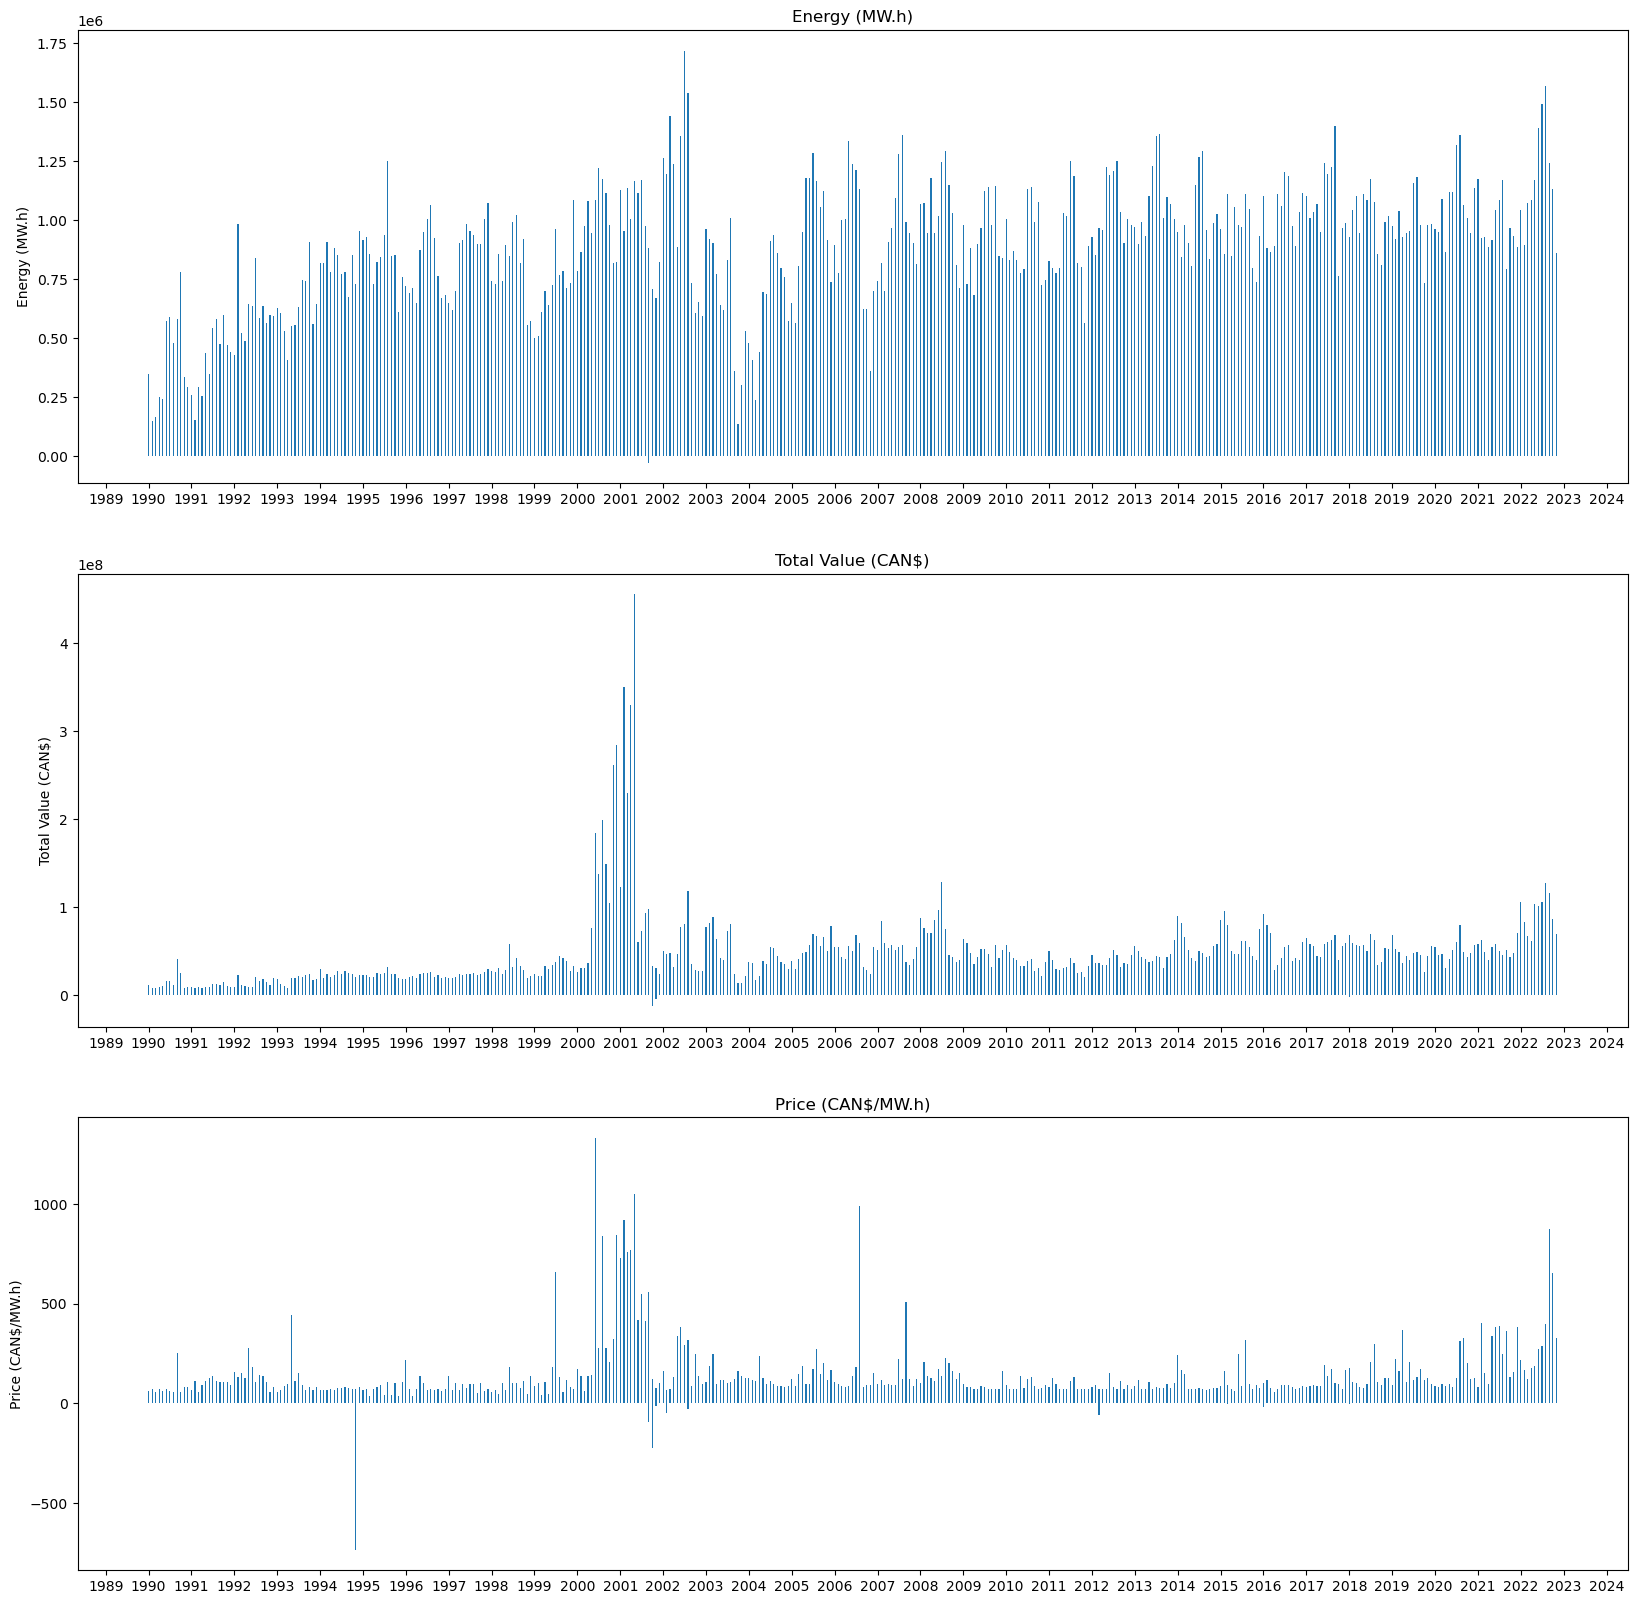

In [189]:
# Plotting Graphs about the numerical variables in Exports
fig, ax = plt.subplots(3, 1, figsize=(20, 20))
years = mdates.YearLocator()

ax[0].set_title("Energy (MW.h)")
ax[0].bar(df_exp["Period"], df_exp["Energy (MW.h)"], width=10)
ax[0].set_ylabel("Energy (MW.h)")
ax[0].xaxis.set_major_locator(years)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax[1].set_title("Total Value (CAN$)")
ax[1].bar(df_exp["Period"], df_exp["Total Value (CAN$)"], width=10)
ax[1].set_ylabel("Total Value (CAN$)")
ax[1].xaxis.set_major_locator(years)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax[2].set_title("Price (CAN$/MW.h)")
ax[2].bar(df_exp["Period"], df_exp["Price (CAN$/MW.h)"], width=10)
ax[2].set_ylabel("Price (CAN$/MW.h)")
ax[2].xaxis.set_major_locator(years)
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.subplots_adjust(wspace=0.45)

plt.show()

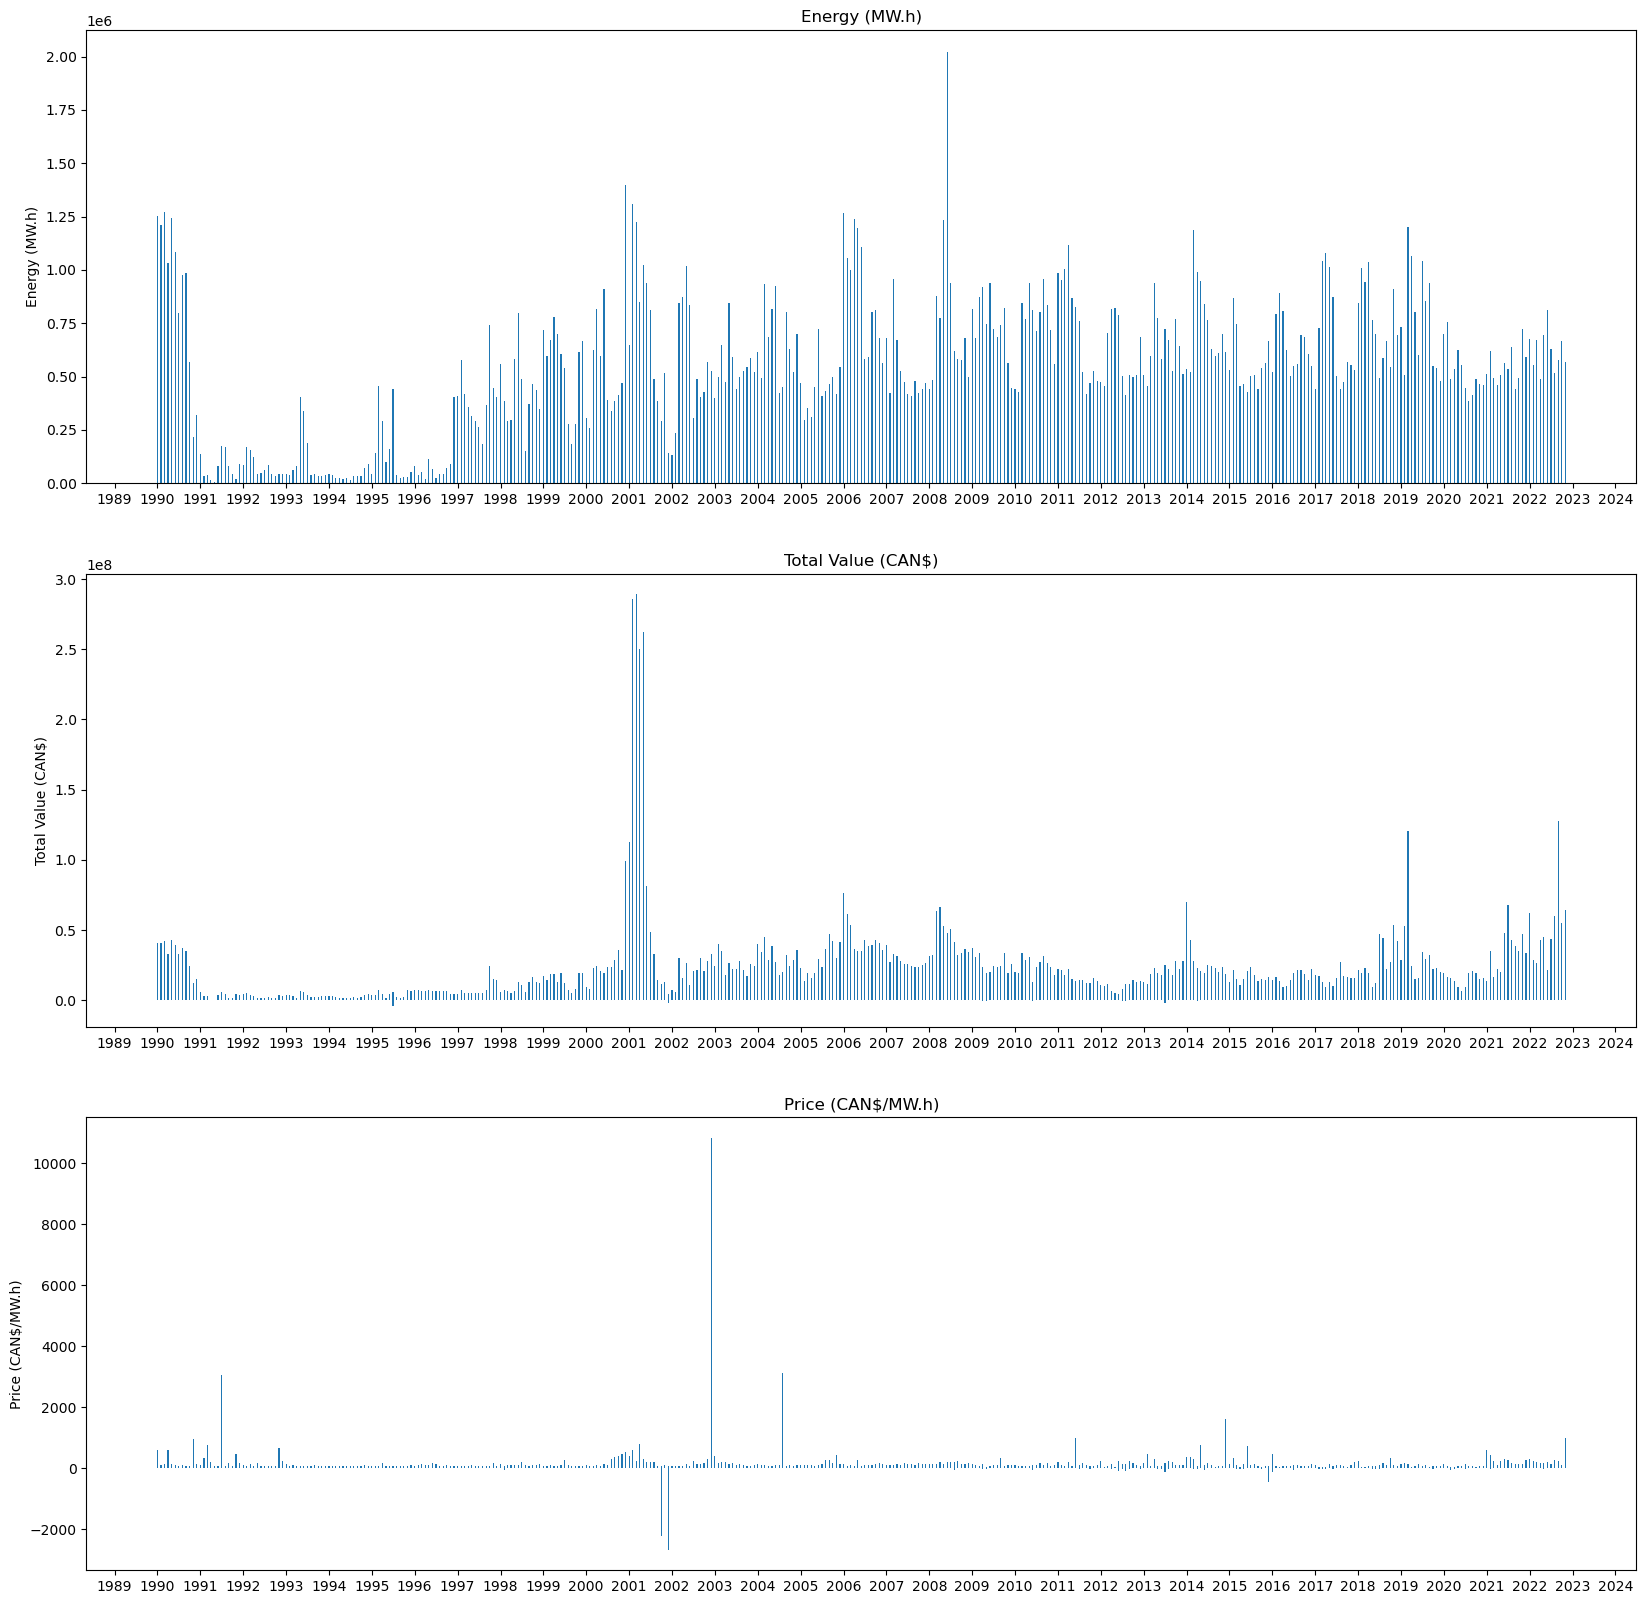

In [190]:
# Plotting Graphs about the numerical variables in Imports
fig, ax = plt.subplots(3, 1, figsize=(20, 20))
years = mdates.YearLocator()

ax[0].set_title("Energy (MW.h)")
ax[0].bar(df_imp["Period"], df_imp["Energy (MW.h)"], width=10)
ax[0].set_ylabel("Energy (MW.h)")
ax[0].xaxis.set_major_locator(years)
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax[1].set_title("Total Value (CAN$)")
ax[1].bar(df_imp["Period"], df_imp["Total Value (CAN$)"], width=10)
ax[1].set_ylabel("Total Value (CAN$)")
ax[1].xaxis.set_major_locator(years)
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax[2].set_title("Price (CAN$/MW.h)")
ax[2].bar(df_imp["Period"], df_imp["Price (CAN$/MW.h)"], width=10)
ax[2].set_ylabel("Price (CAN$/MW.h)")
ax[2].xaxis.set_major_locator(years)
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.subplots_adjust(wspace=0.45)

plt.show()

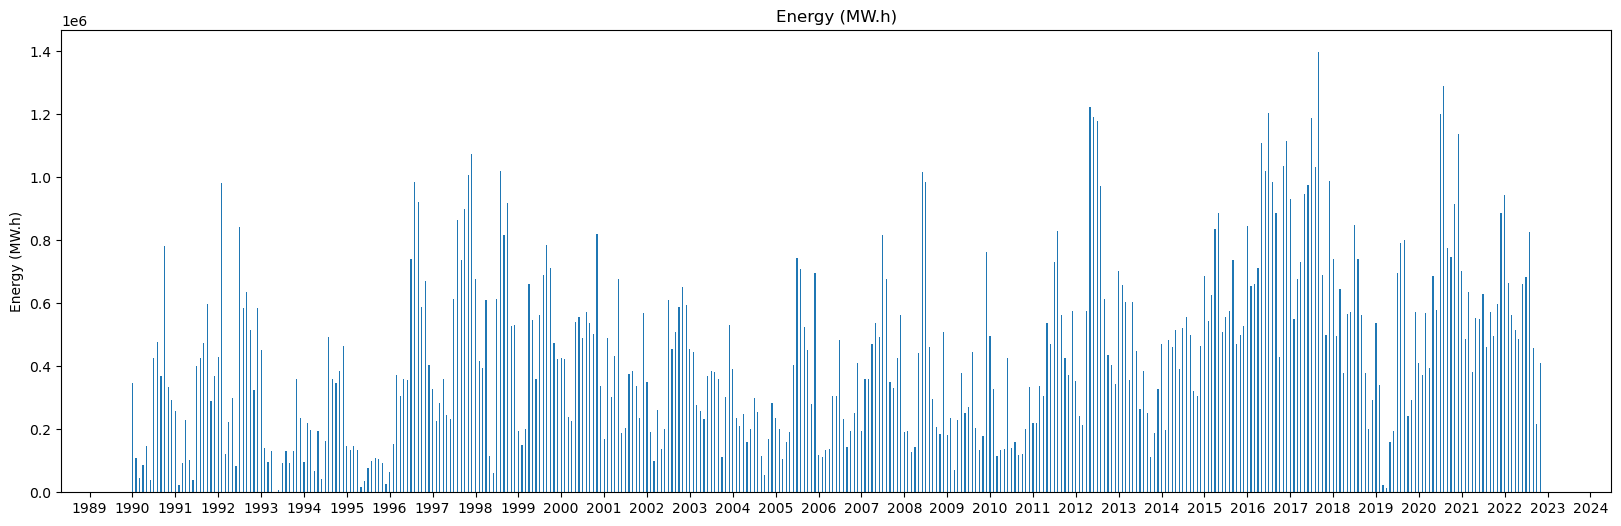

In [203]:
# Filtering the Exports Dataframe for the British Columbia as Source
df_exp_BC = df_exp[df_exp['Source'] == 'British Columbia']

# Plotting a bar graph about the energy exports of British Columbia
fig, ax = plt.subplots(figsize=(20, 6))
years = mdates.YearLocator()

ax.set_title("Energy (MW.h)")
ax.bar(df_exp_BC["Period"], df_exp_BC["Energy (MW.h)"], width=10)
ax.set_ylabel("Energy (MW.h)")
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.subplots_adjust(wspace=0.45)

plt.show()

### ADDING PRIME MINISTERS

In [395]:
# Loading the xlsx file with prime ministers mandate
pm = pd.read_excel(r"C:\Users\felip\OneDrive\Documentos\ST CLAIR COLLEGE\First Semester\ANALYTI TOOLS & DECISN MAKING\Project 1\canada_prime_ministers.xlsx")

# Replacing the sign "_x000D_\n" in the dataframe
pm = pm.replace('_x000D_\n', ' ', regex=True)
pm = pm.rename(columns=lambda x: x.replace('_x000D_\n', ' '))

# Droping duplicates (each prime minister name was appearing twice)
pm.drop_duplicates(subset=['Name (Birth–Death)'], keep='first', inplace=True)

# Droping useless columns and reseting index
pm.drop('No.', axis=1, inplace=True)
pm.reset_index(inplace=True, drop=True)

# Creating the "begin" and "end" columns referent to each prime minister mandate
pm['begin'] = pd.to_datetime(pm['Term of office'], format='%d %B %Y', errors='coerce')
pm['end'] = pd.to_datetime(pm['Term of office_1'], format='%d %B %Y', errors='coerce')

# Droping useless columns again
pm.drop(['Term of office', 'Term of office_1', 'Electoral mandates (Assembly)', 'Political party'], axis=1, inplace=True)

# Adding the last day of the dataset analysed (it was empty before)
pm.loc[22,'end'] = pd.datetime(2022, 12, 31)

# This "pm" (prime ministers) final dataset was used to assign the current prime minister and political party for each row of the first dataset "monthly",
# the process was made with MS Excel

### ADDING POPULATION OF EACH PROVINCE

In [395]:
# Loading the csv file with population per Canadian Province
pop = pd.read_csv(r"C:\Users\felip\JupyterLab Projects\Analytics Tools and Decision Making\population_per_province.csv", sep=',')

# The initial dataset had the population per quarter, but we decided to get the population per year, so we left only the fourth quarter pop.
rows_off = pop[pop['Geography'].str.startswith(('Q1', 'Q2', 'Q3'))].index
pop.drop(rows_off, inplace=True)

# Removing the "Q4 " in front of the year, leaving just the year in each row 
pop['Geography'] = pop['Geography'].apply(lambda x: x[3:])

# Standardizing the name of the columns to match the main dataset, reseting index and seting 'Year' as index
pop.columns = ['Year', 'Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Québec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia', 'Yukon',
       'Northwest Territories', 'Nunavut']
pop.reset_index(drop=True, inplace=True)
pop.set_index('Year', inplace=True)

# Creating the 'Year' column through the date of each row
df['Year'] = df['Period'].apply(lambda x: x[-4:])

# Separating the main dataset in exportations and exportations
df_exp = df[df['Activity'] == 'Exports']
df_imp = df[df['Activity'] == 'Imports']

# Creating the 'Province Pop' with the population of each Province that is either importing or exporting energy, using the pop dataframe
df_exp.loc[:, 'Province Pop'] = df_exp.apply(lambda x: pop.loc[x['Year'], x['Source']], axis=1)
df_imp.loc[:, 'Province Pop'] = df_imp.apply(lambda x: pop.loc[x['Year'], x['Destination']], axis=1)

# Concatenating both dataframes into one again
df = pd.concat([df_exp, df_imp], axis=0)

### ADDING NUMBER OF POWER PLANTS PER PROVINCE

In [395]:
# Loading the csv file with number of power plants per Canadian Province
pp = pd.read_csv(r"C:\Users\felip\OneDrive\Documentos\ST CLAIR COLLEGE\First Semester\ANALYTI TOOLS & DECISN MAKING\Project 1\power_plants.csv")

# Creating a list with all the years analysed
lista = []
for x in range(1990,2023):
    lista.append(x)

# Creating a dictionary with years and respective amount of power plants per province
dic = {'Year':lista}

# For loop to iterate through all the province names and create separate dataframes
for province in pp['Province'].unique():
    lista_pp = []
    filtro = pp[pp['Province'] == province]
    # For loop to iterate through the years analyzed and check how many power plants there were in the province in that year
    for ano in lista:
        lista_pp.append(filtro[filtro['Startup'] < ano].count()['Startup'])
    # Adding the list of number of power plants per year to the dictionary
    dic[province] = lista_pp

# Using the dictionary to create the dataframe
pp_per_year = pd.DataFrame(dic).set_index('Year')

# Standardizing the name of the columns to match the main dataset and reseting index
pp_per_year.columns = ['Ontario', 'Québec', 'Newfoundland and Labrador', 'British Columbia',
       'Alberta', 'Manitoba', 'New Brunswick', 'Saskatchewan', 'Nova Scotia']
pp_per_year.index = pp_per_year.index.astype(str)

# Creating the 'Province Power Plants' with the number of power plants in the province that is either importing or exporting
# energy, using the pp_per_year dataframe
df_exp.loc[:, 'Province Power Plants'] = df_exp.apply(lambda x: pp_per_year.loc[x['Year'], x['Source']], axis=1)
df_imp.loc[:, 'Province Power Plants'] = df_imp.apply(lambda x: pp_per_year.loc[x['Year'], x['Destination']], axis=1)

# Concatenating both dataframes into one again
df = pd.concat([df_exp, df_imp], axis=0)

### ADDING THE GDP PER PROVINCE

In [395]:
# Loading the csv file with the GDP per Canadian Province
gdp = pd.read_csv(r"C:\Users\felip\OneDrive\Documentos\ST CLAIR COLLEGE\First Semester\ANALYTI TOOLS & DECISN MAKING\Project 1\gdp from 1990.csv", index_col=0)

# Setting 'Year' as the index name
gdp.index.name = 'Year'

# Standardizing the name of the columns to match the main dataset
gdp.columns = ['Newfoundland and Labrador', 'Prince Edward Island', 'Nova Scotia',
       'New Brunswick', 'Québec', 'Ontario', 'Manitoba', 'Saskatchewan',
       'Alberta', 'British Columbia', 'Yukon', 'Northwest Territories', 'Nunavut']

# Setting the index type as string
gdp.index = gdp.index.astype(str)

# Using the gdp of 2021 to 2022 (We didn't find the 2022 GDP in the dataset)
gdp.loc['2022',] = gdp.loc['2021',]

# Creating the 'Province GDP' with the GDP of each Province that is either importing or exporting energy, using the gdp dataframe
df_exp.loc[:, 'Province GDP'] = df_exp.apply(lambda x: gdp.loc[x['Year'], x['Source']], axis=1)
df_imp.loc[:, 'Province GDP'] = df_imp.apply(lambda x: gdp.loc[x['Year'], x['Destination']], axis=1)

# Concatenating both dataframes into one again, and reseting index of the main dataframe
df = pd.concat([df_exp, df_imp], axis=0)
df.reset_index(drop=True, inplace=True)